In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
import matplotlib.pyplot as plt



In [2]:
file_path = "C:\\Users\\DeLL\\Desktop\\network_workforce.csv"
df = pd.read_csv(file_path)
df.head()

,Date,DoW,Rain_1,PrevDayE,Act_Rep,partition
0,1/2/2014,Thursday,0.0,50,51,6.013915e-154
1,1/3/2014,Friday,0.0,51,48,6.013915e-154
2,1/4/2014,Saturday,0.0,48,25,6.013915e-154
3,1/5/2014,Sunday,0.0,25,19,6.013915e-154
4,1/6/2014,Monday,0.0,19,85,6.013915e-154


In [3]:
# Drop the 'Date' column (identifier)
df.drop(columns=['Date'], inplace=True)


In [4]:
# Perform one-hot encoding for the 'DoW' column
df_encoded = pd.get_dummies(df, columns=['DoW'], drop_first=True)

In [5]:
# Define features (IVs) and labels (DV)
x = df_encoded[['DoW_Monday', 'DoW_Tuesday', 'DoW_Wednesday', 'DoW_Thursday', 'DoW_Saturday', 'DoW_Sunday', 'Rain_1', 'PrevDayE']]
y = df_encoded['Act_Rep']

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,shuffle=True) 

In [7]:
x_train

,DoW_Monday,DoW_Tuesday,DoW_Wednesday,DoW_Thursday,DoW_Saturday,DoW_Sunday,Rain_1,PrevDayE
54,0,1,0,0,0,0,0.0,97
28,0,0,0,1,0,0,0.0,75
78,0,0,0,0,0,0,0.4,57
39,1,0,0,0,0,0,0.0,23
30,0,0,0,0,1,0,0.0,52
...,...,...,...,...,...,...,...,...
19,0,1,0,0,0,0,0.5,113
141,0,0,0,0,0,0,0.3,60
137,1,0,0,0,0,0,0.0,23
18,1,0,0,0,0,0,0.5,17


In [8]:
x_train=sm.add_constant(x_train) # calculate intercept or beta node or constant
regression_model=sm.OLS(y_train,x_train) # creating object of sm.OLS (Ordinary least square)
results=regression_model.fit() # actual calculation / best fit
results.summary() # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Act_Rep   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     51.95
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.49e-31
Time:                        12:18:22   Log-Likelihood:                -390.02
No. Observations:                 105   AIC:                             798.0
Df Residuals:                      96   BIC:                             821.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            64.9026      8.578      7.566      0.000      47.876      81.929
DoW_Monday       22.6621      6.060      3.740      0.000      10.634      34.690
DoW_Tuesday       4.7877      7.277      0.658      0.512      -9.656      19.232
DoW_Wednesday     2.9521      3.907      0.756      0.452      -4.803      10.707
DoW_Thursday      1.8965      4.001      0.474      0.637      -6.045       9.838
DoW_Saturday    -29.7629      3.939     -7.556      0.000     -37.582     -21.944
DoW_Sunday      -38.0954      5.590     -6.815      0.000     -49.191     -27.000
Rain_1           11.8288      2.929      4.039      0.000       6.016      17.642
PrevDayE         -0.1497      0.145     -1.033      0.304      -0.437       0.138
==============================================================================
Omnibus:                      126.913   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3668.373
Skew:                          -3.987   Prob(JB):                         0.00
Kurtosis:                      30.837   Cond. No.                         710.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Get predictions
y_train_pred = results.predict(x_train)
y_test_pred = results.predict(sm.add_constant(x_test))

# Calculate RMSE for training set
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))

# Calculate RMSE for test set
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))

In [10]:
print("RMSE for training set:", rmse_train)
print("RMSE for test set:", rmse_test)

RMSE for training set: 9.9296533139013
RMSE for test set: 6.499564127376112


Decision Tree Regression RMSE - Training Set: 9.835976663686214
Decision Tree Regression RMSE - Test Set: 8.320621636120924
|--- DoW_Monday <= 0.50
|   |--- PrevDayE <= 46.50
|   |   |--- value: [24.81]
|   |--- PrevDayE >  46.50
|   |   |--- DoW_Saturday <= 0.50
|   |   |   |--- Rain_1 <= 0.15
|   |   |   |   |--- value: [54.46]
|   |   |   |--- Rain_1 >  0.15
|   |   |   |   |--- value: [68.05]
|   |   |--- DoW_Saturday >  0.50
|   |   |   |--- value: [28.79]
|--- DoW_Monday >  0.50
|   |--- value: [87.69]



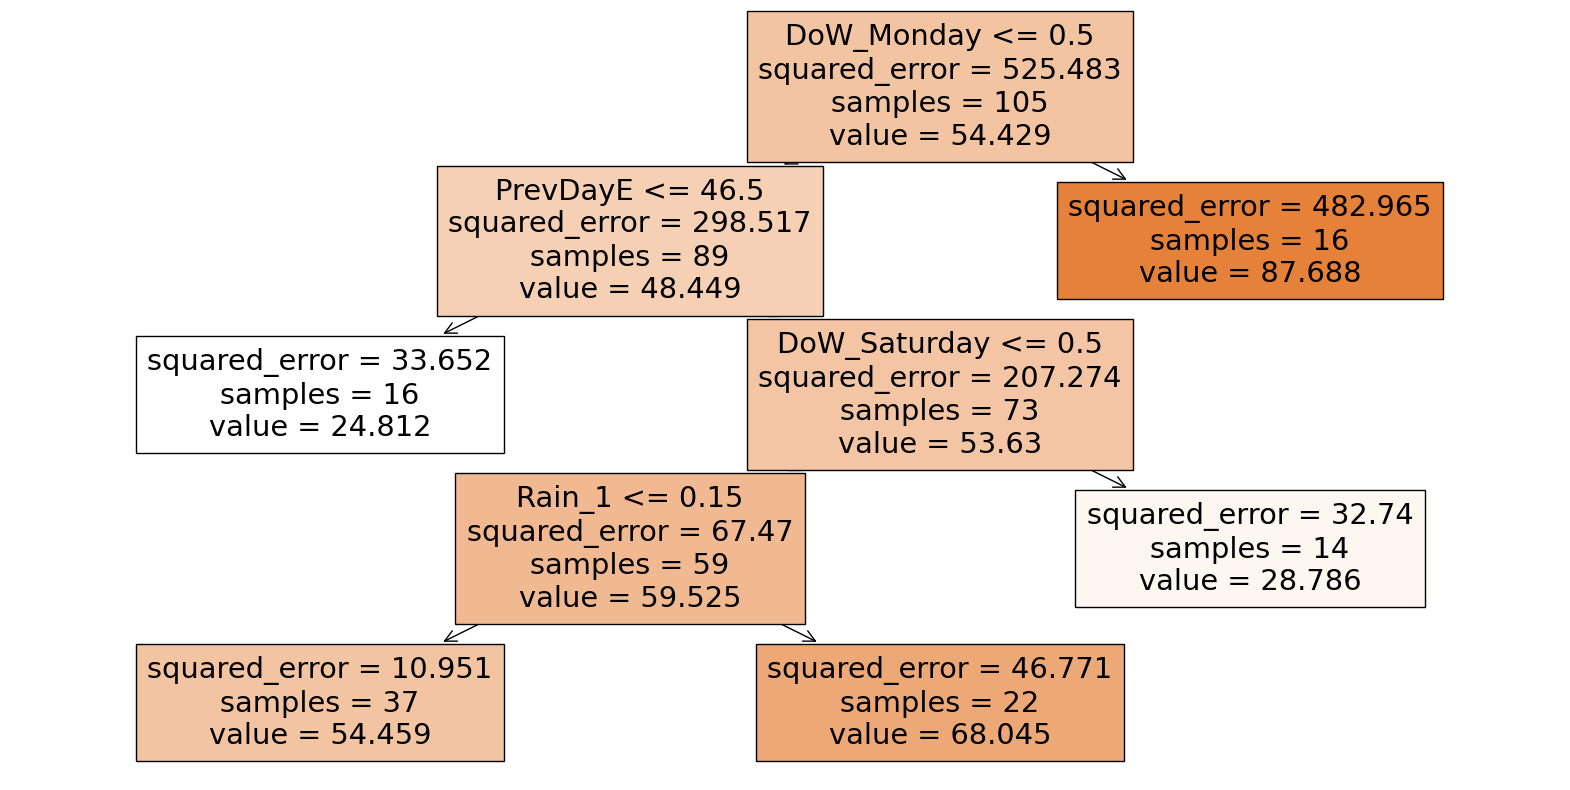

In [15]:

# Creating DecisionTreeRegressor instance
dtr = DecisionTreeRegressor(ccp_alpha = 10)

# Fitting the decision tree model on the training data
dtr.fit(x_train, y_train)
# Add constant column to testing dataset
x_test = sm.add_constant(x_test)

# Get predictions for training and test sets
y_train_pred_tree = dtr.predict(x_train)
y_test_pred_tree = dtr.predict(x_test)

# Calculate RMSE for training set
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

# Calculate RMSE for test set
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

# Print RMSE for training and test sets
print("Decision Tree Regression RMSE - Training Set:", rmse_train_tree)
print("Decision Tree Regression RMSE - Test Set:", rmse_test_tree)

# Print the decision tree
tree_rules = export_text(dtr, feature_names=x_train.columns.tolist())
print(tree_rules)

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dtr, filled=True, feature_names=x_train.columns)  # Assuming x_train is a pandas DataFrame
plt.show()